In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random
import sys
import gc
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelBinarizer
import PIL
from PIL import Image
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import keras
from keras import layers
from keras import metrics
from keras.models import load_model
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Dropout
from keras import optimizers
from keras import models
from keras.models import Sequential
from keras import preprocessing
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array, array_to_img, load_img
from keras.applications import VGG16
from keras.utils import plot_model

# Global variables

In [4]:
img_size = 500
batch_size = 32
epochs = 40
train_size = 0.7
val_size = 0.2
test_size = 0.1
seed = 4321
channels = 3
learning_rate = 0.00001

# Get classes and entries per classes

In [5]:
# pro_dir = "/content/drive/MyDrive/Hackathons/Piramal Finance"
# dataset = "/content/drive/MyDrive/Hackathons/Piramal Finance/dataset"
# data = "/content/drive/MyDrive/Hackathons/Piramal Finance/data"

In [6]:
# if not os.path.exists(data):
#     os.mkdir(data)

# for doc_dir in os.listdir(dataset):
#     dir_pth = os.path.join(dataset, doc_dir)
#     for i, doc in enumerate(os.listdir(os.path.join(dataset, doc_dir))):
#         doc_path = os.path.join(dir_pth, doc)
#         if not os.path.exists(os.path.join(data, doc_dir)):
#             os.mkdir(os.path.join(data, doc_dir))
#         if not doc.endswith(".gif"):
#             Image.open(doc_path).convert('RGB').save(f"{data}/{doc_dir}/{doc_dir}_{i}.jpg","JPEG")

['Driving License', 'PAN Card', 'Aadhaar Card', 'Photo', 'Salary Slip', 'Utility Bill', 'Voter ID', 'Passport', 'Cheque Leaf']
[36, 59, 98, 68, 111, 115, 43, 52, 52]


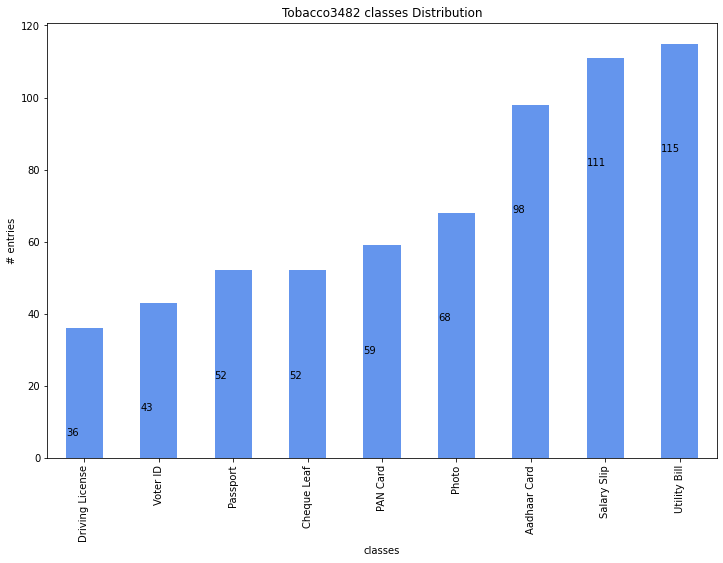

In [7]:
d = "data"
# d = data

classes = (os.listdir(d))

paths = [os.path.join(d, o) for o in os.listdir(d) if os.path.isdir(os.path.join(d,o))]

nbEntries = []

for i in range(len(classes)):
    nbEntries.append(len(os.listdir(paths[i])))

#################################################
    
print(classes)
print(nbEntries)

df = pd.DataFrame({'classes':classes, 'entries':nbEntries})
ax = df.sort_values(by='entries', ascending=True).plot.bar(x='classes', y='entries', color='cornflowerblue',legend=False, figsize=(12,8))
ax.set_title('Document Classes Distribution')
ax.set_ylabel("# entries")
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()-30))

# Get all images

In [8]:
total_set = []
total_labels = []


for root, dirs, files in os.walk(d):
    for file in files:
        if file.endswith(".jpg"):
            path = os.path.join(root, file)
            total_set.append(path)
            total_labels.append(root.split(os.path.sep)[-1])
            

# Return image class based on list entry (path)         
def getClass(img):
    return img.split(os.path.sep)[-2]


print(total_set[0])
print('GetClass : ', getClass(total_set[0]))
print('Label : ', total_labels[0])

/content/drive/MyDrive/Hackathons/Piramal Finance/data/Driving License/Driving License_0.jpg
GetClass :  Driving License
Label :  Driving License


# Plot data 

/content/drive/MyDrive/Hackathons/Piramal Finance/data/Voter ID/Voter ID_41.jpg


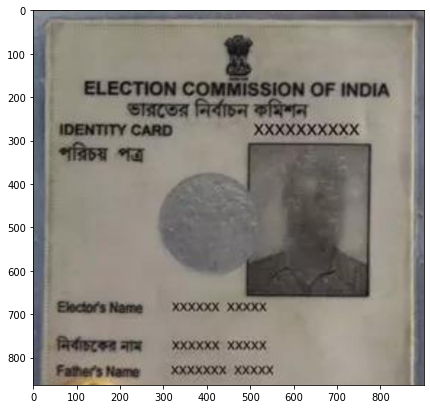

/content/drive/MyDrive/Hackathons/Piramal Finance/data/Cheque Leaf/Cheque Leaf_28.jpg


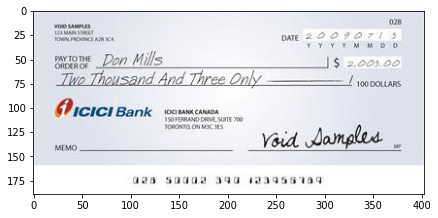

/content/drive/MyDrive/Hackathons/Piramal Finance/data/Photo/Photo_20.jpg


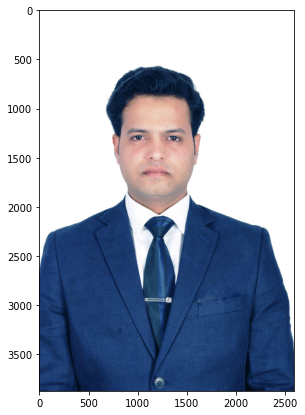

In [9]:
random.Random(seed).shuffle(total_set)

for ima in total_set[0:3] :
    print(ima)
    img = mpimg.imread(ima)
    plt.figure(figsize=(7,7))
    imgplot = plt.imshow(img, cmap="gray")
    plt.show()


# Sorting data in usable sets
![](https://cdn-images-1.medium.com/max/800/1*HpvpA9pBJXKxaPCl5tKnLg.jpeg)

In [10]:
# Get data and separate it in sets
total_len = len(total_set)
index = 0

train_set = []
train_label = []

val_set = []
val_label = []

test_set = []
test_label = []


for i in total_set[0: int(total_len*train_size)] :
    train_set.append(i)
    train_label.append(getClass(i))
    
index = int(total_len*train_size)+1
    
for i in total_set[index: int(index + total_len*val_size)] :
    val_set.append(i)
    val_label.append(getClass(i))
    
index = int(index + total_len*val_size)+1 

for i in total_set[index: total_len] :
    test_set.append(i)
    test_label.append(getClass(i))

print(val_set)
print(val_label)


['/content/drive/MyDrive/Hackathons/Piramal Finance/data/PAN Card/PAN Card_4.jpg', '/content/drive/MyDrive/Hackathons/Piramal Finance/data/Cheque Leaf/Cheque Leaf_27.jpg', '/content/drive/MyDrive/Hackathons/Piramal Finance/data/Aadhaar Card/Aadhaar Card_52.jpg', '/content/drive/MyDrive/Hackathons/Piramal Finance/data/Driving License/Driving License_12.jpg', '/content/drive/MyDrive/Hackathons/Piramal Finance/data/Aadhaar Card/Aadhaar Card_92.jpg', '/content/drive/MyDrive/Hackathons/Piramal Finance/data/Photo/Photo_9.jpg', '/content/drive/MyDrive/Hackathons/Piramal Finance/data/Utility Bill/Utility Bill_15.jpg', '/content/drive/MyDrive/Hackathons/Piramal Finance/data/Aadhaar Card/Aadhaar Card_87.jpg', '/content/drive/MyDrive/Hackathons/Piramal Finance/data/Salary Slip/Salary Slip_26.jpg', '/content/drive/MyDrive/Hackathons/Piramal Finance/data/Aadhaar Card/Aadhaar Card_25.jpg', '/content/drive/MyDrive/Hackathons/Piramal Finance/data/Voter ID/Voter ID_31.jpg', '/content/drive/MyDrive/Hack

# Visualize classes distribution (bar chart)

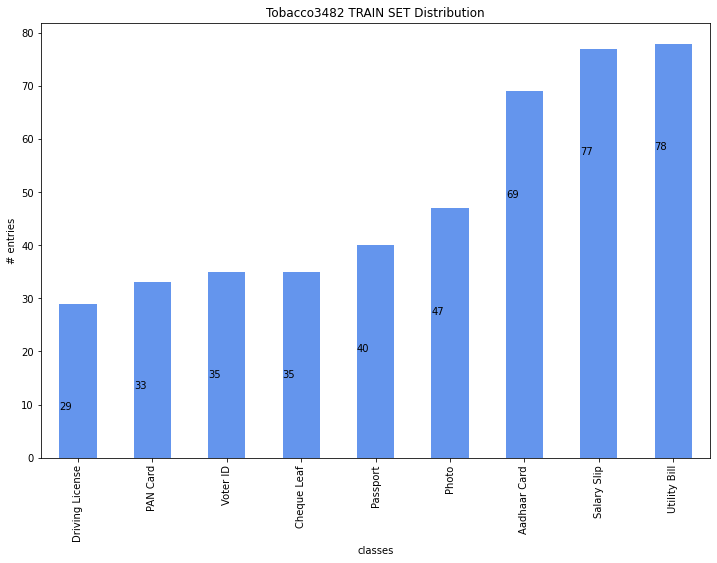

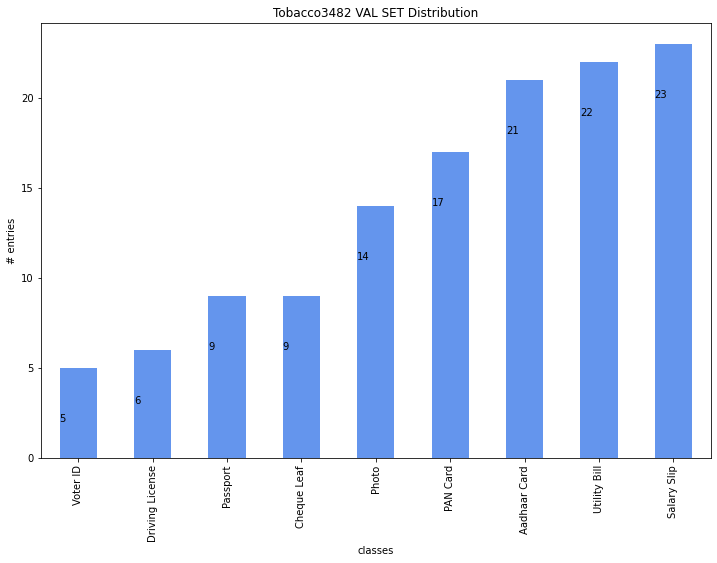

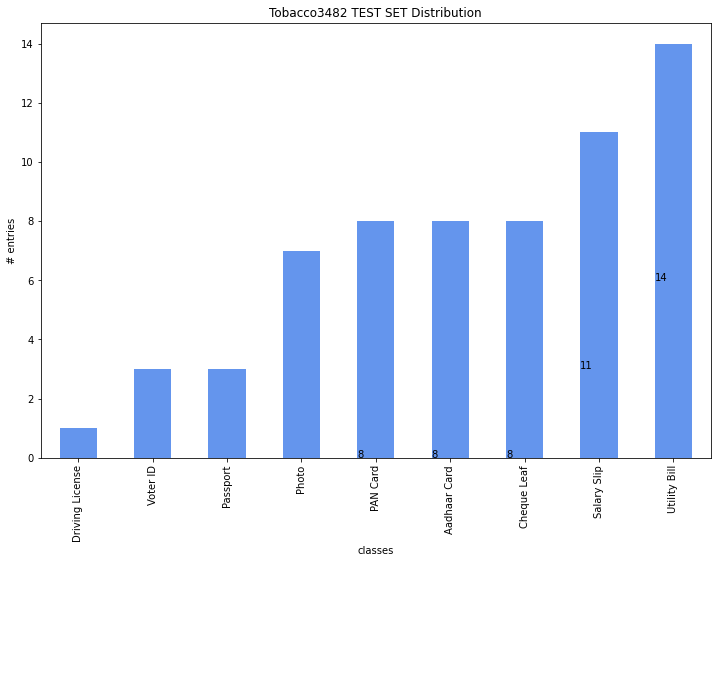

In [11]:
#################################################
# TRAIN SET
instances = [0] * len(classes)
for index, val in enumerate(classes) :
    for e in train_set :
        if(val == getClass(e)) :
            instances[index] += 1

            
df = pd.DataFrame({'classes':classes, 'entries':instances})
ax = df.sort_values(by='entries', ascending=True).plot.bar(x='classes', y='entries', color='cornflowerblue',legend=False, figsize=(12,8))
ax.set_title('Document Data Distributions')
ax.set_ylabel("# entries")
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()-20))

#################################################
# VAL SET
instances = [0] * len(classes)
for index, val in enumerate(classes) :
    for e in val_set :
        if(val == getClass(e)) :
            instances[index] += 1

            
df = pd.DataFrame({'classes':classes, 'entries':instances})
ax = df.sort_values(by='entries', ascending=True).plot.bar(x='classes', y='entries', color='cornflowerblue',legend=False, figsize=(12,8))
ax.set_title('Document Data Distributions')
ax.set_ylabel("# entries")
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()-3))
    
#################################################
# TEST SET
instances = [0] * len(classes)
for index, val in enumerate(classes) :
    for e in test_set :
        if(val == getClass(e)) :
            instances[index] += 1

            
df = pd.DataFrame({'classes':classes, 'entries':instances})
ax = df.sort_values(by='entries', ascending=True).plot.bar(x='classes', y='entries', color='cornflowerblue',legend=False, figsize=(12,8))
ax.set_title('Document Data Distributions')
ax.set_ylabel("# entries")
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()-8))

# Preprocess data (resize, transform to Numpy array and binarize)

[https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html)

In [12]:
def process_images(img_set) : 
    processed_img = []

    for i in range(len(img_set)) :
        processed_img.append(cv2.resize(cv2.imread(img_set[i], cv2.IMREAD_COLOR), (img_size, img_size)))
    
    return processed_img
    
data_train = process_images(train_set)
data_test = process_images(test_set)
data_val = process_images(val_set)

train images shape :  (443, 500, 500, 3)
train labels shape :  (443, 9)
[[[130 129 131]
  [134 133 135]
  [139 138 140]
  ...
  [126 123 125]
  [120 124 128]
  [120 125 128]]

 [[134 133 133]
  [138 137 137]
  [143 141 141]
  ...
  [127 124 126]
  [124 127 131]
  [124 127 131]]

 [[140 136 137]
  [143 139 140]
  [146 142 143]
  ...
  [128 125 127]
  [123 125 129]
  [122 125 129]]

 ...

 [[113  92  90]
  [112  91  89]
  [108  89  86]
  ...
  [109  98  94]
  [108  96  94]
  [108  96  94]]

 [[114  93  91]
  [112  91  89]
  [108  89  86]
  ...
  [108  97  93]
  [108  96  94]
  [108  96  94]]

 [[115  94  92]
  [112  91  90]
  [108  89  86]
  ...
  [107  96  92]
  [108  96  94]
  [108  96  94]]]
test shape :  (63, 500, 500, 3)
(63, 9)
valdiation shape :  (126, 500, 500, 3)
(126, 9)
Voter ID
[0 0 0 0 0 0 0 0 1]
['Aadhaar Card' 'Cheque Leaf' 'Driving License' 'PAN Card' 'Passport'
 'Photo' 'Salary Slip' 'Utility Bill' 'Voter ID']


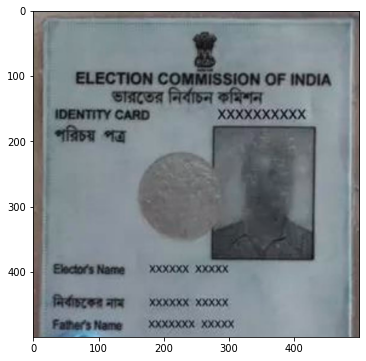

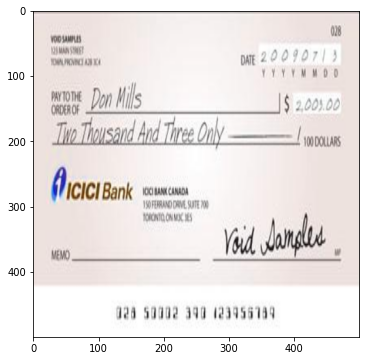

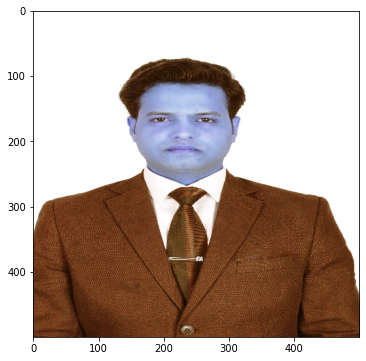

In [13]:
lb = LabelBinarizer()
lb.fit(list(classes))

x_train = np.array(data_train)
y_train =lb.transform(np.array(train_label))

x_test = np.array(data_test)
y_test = lb.transform(np.array(test_label))

x_val = np.array(data_val)
y_val = lb.transform(np.array(val_label))

print("train images shape : ", x_train.shape)
print("train labels shape : ", y_train.shape)
print(x_train[0])

print("test shape : ", x_test.shape)
print(y_test.shape)
print("valdiation shape : ", x_val.shape)
print(y_val.shape)


for i in range(3) :
    plt.figure(figsize=(6,6))
    imgplot = plt.imshow(x_train[i])

print(train_label[0])
print(y_train[0])
print(lb.classes_)

In [14]:
with open("/content/drive/MyDrive/Hackathons/Piramal Finance/classes.txt", "w") as f:
    f.writelines(list(lb.classes_))
f.close()

# Create base model (using pretrained CNN)

[https://keras.io/applications/](https://keras.io/applications/)

Trainable weights : TRUE

To "freeze" a layer means to exclude it from training. Allows to train the whole model and not only the last added layers --> 5/10% better accuracy. it takes about three to four times longer for training since there are way more parameters to train.


In [15]:
base_model = VGG16(weights = "imagenet", include_top=False, input_shape = (img_size, img_size, channels))

#for layer in base_model.layers:
#    layer.trainable = False
    
base_model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500, 500, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 500, 500, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 500, 500, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 250, 250, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 250, 250, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 250, 250, 128)     147584    
                                                              

# Create custom model
Base is VGG16, adding a flatten layer, a Dense layer and a dropout layer. Last Dense layer specify the number of classes

[https://keras.io/getting-started/sequential-model-guide/](https://keras.io/getting-started/sequential-model-guide/)

[https://keras.io/layers/core/](https://keras.io/layers/core/)

In [16]:
model = models.Sequential()

model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu',  name='dense'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(classes), activation='softmax',  name='predictions'))

model.summary()

print('Number of trainable weights : ', len(model.trainable_weights))

# plot_model(model, to_file='model.png')
# SVG(model_to_dot(model).create(prog='dot', format='svg'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 15, 15, 512)       14714688  
                                                                 
 flatten (Flatten)           (None, 115200)            0         
                                                                 
 dense (Dense)               (None, 128)               14745728  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 predictions (Dense)         (None, 9)                 1161      
                                                                 
Total params: 29,461,577
Trainable params: 29,461,577
Non-trainable params: 0
_________________________________________________________________
Number of trainable weights :  30


# Training the model

**Compile** : Configures the model for training.

**Fit** : Trains the model for a given number of epochs (iterations on a dataset).

[https://keras.io/models/model/](https://keras.io/models/model/)

In [17]:
model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

train_model = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_val, y_val))

Epoch 1/40
14/14 [==============================] - 105s 5s/step - loss: 9.1397 - accuracy: 0.1806 - val_loss: 1.6092 - val_accuracy: 0.5000
Epoch 2/40
14/14 [==============================] - 36s 3s/step - loss: 2.0076 - accuracy: 0.4266 - val_loss: 1.0643 - val_accuracy: 0.5794
Epoch 3/40
14/14 [==============================] - 36s 3s/step - loss: 1.1946 - accuracy: 0.6005 - val_loss: 0.7144 - val_accuracy: 0.7619
Epoch 4/40
14/14 [==============================] - 36s 3s/step - loss: 0.7075 - accuracy: 0.7472 - val_loss: 0.4723 - val_accuracy: 0.8333
Epoch 5/40
14/14 [==============================] - 36s 3s/step - loss: 0.4782 - accuracy: 0.8442 - val_loss: 0.3289 - val_accuracy: 0.9127
Epoch 6/40
14/14 [==============================] - 36s 3s/step - loss: 0.3318 - accuracy: 0.8713 - val_loss: 0.2549 - val_accuracy: 0.9286
Epoch 7/40
14/14 [==============================] - 36s 3s/step - loss: 0.2039 - accuracy: 0.9300 - val_loss: 0.2132 - val_accuracy: 0.9286
Epoch 8/40
14/14 [=

# Plot accuracy and loss of trained model (line chart)

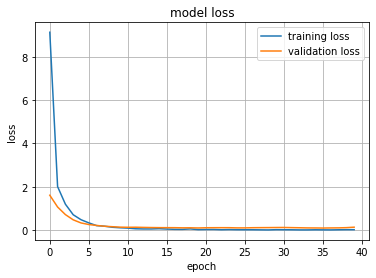

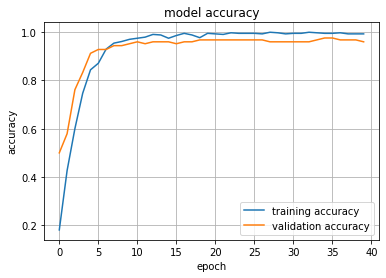

In [18]:
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.savefig("/content/drive/MyDrive/Hackathons/Piramal Finance/Plots/model_loss_bs_32_img_500.png")
plt.show()

plt.plot(train_model.history['accuracy'])
plt.plot(train_model.history['val_accuracy'])
plt.title('model accuracy')
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='lower right')
plt.savefig("/content/drive/MyDrive/Hackathons/Piramal Finance/Plots/model_accuracy_bs_32_img_500.png")
plt.show()

# Test prediction accuracy on test set

In [19]:
# combine predictions + average for better score ? 

score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 15s 14s/step - loss: 0.2827 - accuracy: 0.9206
Test loss: 0.28270965814590454
Test accuracy: 0.920634925365448


# Save model
* the architecture of the model, allowing to re-create the model
* the weights of the model
* the training configuration (loss, optimizer)
* the state of the optimizer, allowing to resume training exactly where you left off.

In [20]:
model.save(os.path.join(pro_dir, "model_3_img_500.h5"))

# Use model on test set

In [21]:
predictions = model.predict(x_test, verbose=1)
predictions_list = predictions.tolist()
predicted_classes = lb.classes_

count_true = 0;
count_false = 0;

for i, prediction in enumerate(predictions_list):
    state = True
    if (predicted_classes[np.argmax(prediction)] != test_label[i]) :
        state = False
        count_false += 1
    else :
        count_true += 1
    print("Prediction : ", predicted_classes[np.argmax(prediction)], "   |   Real class : ", test_label[i],  "   |   Result : ", state)

print("\nNumber of success : ", count_true) 
print("Number of error : ", count_false) 
print("Error rate : ", count_true/len(test_label))


2/2 [==============================] - 1s 774ms/step
Prediction :  PAN Card    |   Real class :  PAN Card    |   Result :  True
Prediction :  Salary Slip    |   Real class :  Salary Slip    |   Result :  True
Prediction :  PAN Card    |   Real class :  PAN Card    |   Result :  True
Prediction :  Aadhaar Card    |   Real class :  Aadhaar Card    |   Result :  True
Prediction :  Passport    |   Real class :  Passport    |   Result :  True
Prediction :  Voter ID    |   Real class :  Voter ID    |   Result :  True
Prediction :  Salary Slip    |   Real class :  Salary Slip    |   Result :  True
Prediction :  Aadhaar Card    |   Real class :  Aadhaar Card    |   Result :  True
Prediction :  Cheque Leaf    |   Real class :  Cheque Leaf    |   Result :  True
Prediction :  Utility Bill    |   Real class :  Utility Bill    |   Result :  True
Prediction :  Utility Bill    |   Real class :  Utility Bill    |   Result :  True
Prediction :  Utility Bill    |   Real class :  Utility Bill    |   Resu